<a href="https://colab.research.google.com/github/khatgarhaastha/MSAI339_HW1/blob/main/Aastha_Khatgarh_MSAI339_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1**

The purpose of Homework 1 is to use Python to perform data analysis to solve some business questions related to a hotels business.<br>
<br>


Some useful libraries - more could be necessary

In [2]:
import pandas as pd #used for data manipulatoin and analysis, particularly tables
import matplotlib.pyplot as plt #Basic plotting library
import seaborn as sns #Build on matplotlib, provides visually appealing plots
import numpy as np #For numerical computations
import re #commonly used for string matching, search and manipulation operations

Question 0: Import the hotels data into your environment, and generate a unique ID.



**Adding id as a unique identifier**

In [3]:
from IPython.core.display import display, HTML # For dataframe styling purpose


df = pd.read_csv('hotel_data.csv') #Loading data from csv file into a pandas dataframe 'df'
df['id'] = df.index + 1 # Adding an id colums which starts from 1 and increments for each row

cols = list(df.columns) # checking the position of id column
cols = ['id'] + [col for col in cols if col != 'id'] # Reordering the list
df = df.reindex(columns = cols) # Reindex the dataframe to reorder the columns

l = list(df.columns)
print('Total columns including id:', len(l))
print('List of columns in hotel_data.csv file:', l, "\n\n")

# Below is the python function that utilizes HTML to style dataframe
def styled_df(df):
    # Use the .to_html() DataFrame method to get an HTML table
    table = df.to_html(index=False)

    # Add style with CSS
    table = table.replace('<table', '<table style="font-size: 80%;"')

    # Display the HTML object
    display(HTML(table))

styled_df( df.head())


Total columns including id: 33
List of columns in hotel_data.csv file: ['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date'] 




id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Question 1: Create a function that displays the data type, number and percentage of null values, and number of unique values for each column of a given dataframe. (5 points)

In [4]:
def analyze_dataframe(df):
    # Initialize an empty DataFrame to store the results
    analysis = pd.DataFrame()

    # Column names for the new DataFrame
    analysis['Column Name'] = df.columns
    analysis['Data Type'] = [df[col].dtype for col in df.columns]
    analysis['Number of Nulls'] = [df[col].isna().sum() for col in df.columns]
    analysis['% of Nulls'] = [(df[col].isna().sum() / df.shape[0]) * 100 for col in df.columns]
    analysis['Number of Unique Values'] = [df[col].nunique() for col in df.columns]

    return analysis
analysis_result = analyze_dataframe(df)
styled_df(analysis_result) # print the styled dataframe using function 'def styled_df(df)'

Column Name,Data Type,Number of Nulls,% of Nulls,Number of Unique Values
id,int64,0,0.000000,119390
hotel,object,0,0.000000,2
is_canceled,int64,0,0.000000,2
lead_time,int64,0,0.000000,479
arrival_date_year,int64,0,0.000000,3
arrival_date_month,object,0,0.000000,12
arrival_date_week_number,int64,0,0.000000,53
arrival_date_day_of_month,int64,0,0.000000,31
stays_in_weekend_nights,int64,0,0.000000,17
stays_in_week_nights,int64,0,0.000000,35


Question 2A: Find the total number of visitors who have canceled a reservation. (1.5 points)

In [5]:
total_canceled = df['is_canceled'].sum()
print(f"Total number of visitors who have canceled a reservation: {total_canceled}")

Total number of visitors who have canceled a reservation: 44224


Question 2B: Which month has the most cancellations? (1.5 points)

In [6]:
canceled_reservations = df[df['is_canceled'] == 1]
cancellations_by_month = canceled_reservations.groupby('arrival_date_month').size()
most_cancellations_month = cancellations_by_month.idxmax()
most_cancellations_count = cancellations_by_month.max()

# Printing the most cancellations with the corresponding month
print(f"The month with the most cancellations is {most_cancellations_month} with {most_cancellations_count} cancellations. \n\n")

# Making a dataframe for better visualisation of data and utilising html to diaplay table
df_cancellations_by_month = cancellations_by_month.reset_index()
df_cancellations_by_month.columns = ['Month', 'Number of cancellations']

# Sorting the table by months in ascending order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_cancellations_by_month['Month'] = pd.Categorical(df_cancellations_by_month['Month'], categories = month_order, ordered = True)
df_cancellations_by_month = df_cancellations_by_month.sort_values('Month')

#df_cancellations_by_month.set_index('Month', inplace=True)

# Print the sorted dataframe for cancelletions in each month
styled_df(df_cancellations_by_month)




The month with the most cancellations is August with 5239 cancellations. 




Month,Number of cancellations
January,1807
February,2696
March,3149
April,4524
May,4677
June,4535
July,4742
August,5239
September,4116
October,4246


Question 2C: Plot the number of cancellations per month in a histogram. (2 points)

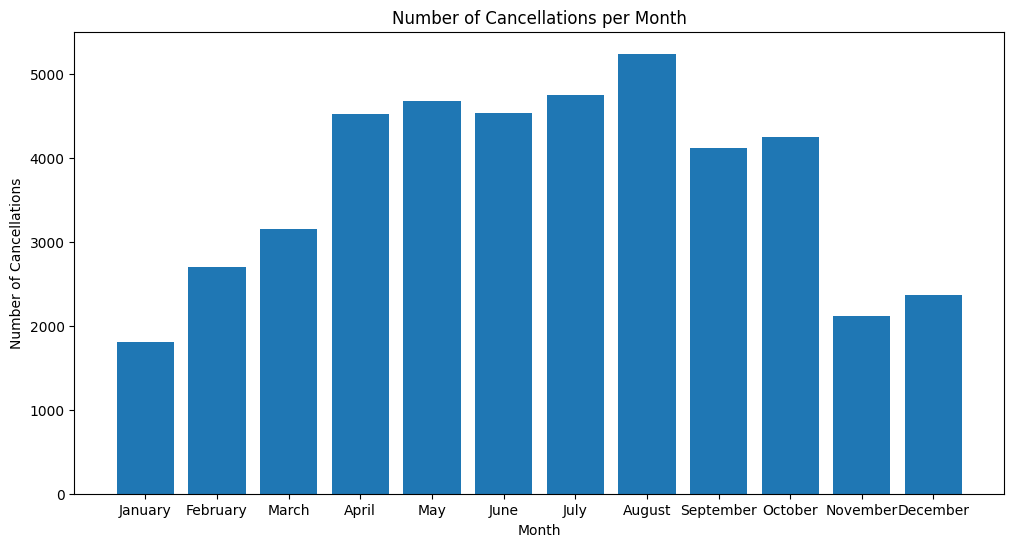

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(df_cancellations_by_month['Month'], df_cancellations_by_month['Number of cancellations'])

plt.title('Number of Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

plt.show()

Question 3: Create a function that prints the percentage of canceled reservations for EACH hotel. (5 points)

In [8]:
# finding how many different hotels are in the dataset
unique_hotels = df['hotel'].unique()
print('Hotels in data set:\n',unique_hotels, '\n\n')

# function to calculate the percentage of canceled reservations for each hotel
def hotel_cancellations(df):

  # finding toatl reservations for each hotel
  total_reservations_per_hotel = df.groupby('hotel').size()
  print('Total reservations for each hotel:\n', total_reservations_per_hotel,'\n\n')

  # finding out the cancellation data for each hotel
  total_cancellation_per_hotel = df.groupby('hotel')['is_canceled'].sum()
  print('Total cancelations for each hotel:\n',total_cancellation_per_hotel,'\n\n')

  cancelation_percentage_for_each_hotel = (total_cancellation_per_hotel / total_reservations_per_hotel)*100

  for hotel , percentage in cancelation_percentage_for_each_hotel.items():
    print(f"Percentage of canceled reservation for {hotel} is {percentage:.2f}%\n")

hotel_cancellations(df)




Hotels in data set:
 ['Resort Hotel' 'City Hotel'] 


Total reservations for each hotel:
 hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64 


Total cancelations for each hotel:
 hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64 


Percentage of canceled reservation for City Hotel is 41.73%

Percentage of canceled reservation for Resort Hotel is 27.76%



Question 4: Filter the dataset so that it only contains visitors who have not canceled their reservations. Store this dataset as a separate variable (we will be using it going forward). (5 points)

In [9]:
df_not_canceled = df[df['is_canceled'] == 0]
styled_df(df_not_canceled.head())

id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Question 5A: Using the filtered dataset from Question 4, create a plot for each hotel showing the number of reservations for each month of arrival. Draw a conclusion on whether the trend is the same between the two hotels (in a sentence or two). (2.5 points)

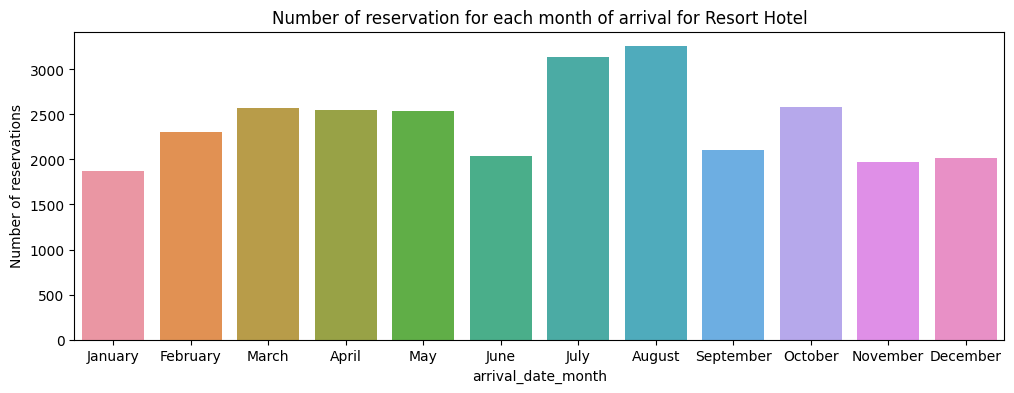

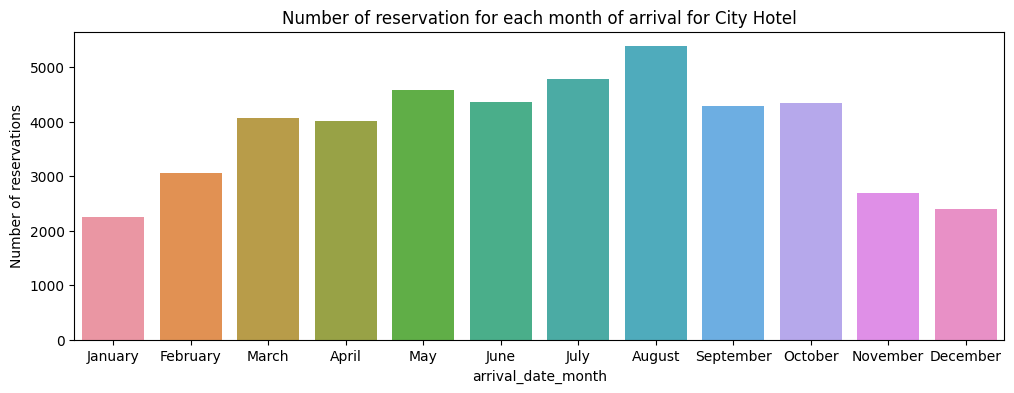

In [14]:
# 1. Filter the dataset by hotel
# 2. group the dtaset by month of arrival
# 3. Count the number of reservations for each month
# 4. Plot the results

# making a for loop to go over the data for differen hotels (overwrites the data in filterd_df for each unique hotel in each iteration)
for hotel in df_not_canceled['hotel'].unique():

  # Filter the dataframe for each hotel
  filtered_df = df_not_canceled[df_not_canceled['hotel'] == hotel]

  # Group the data by month and count the reservations
  reservations_by_month = filtered_df.groupby('arrival_date_month').size().reset_index(name = 'Number of reservations')

  # Make the months ordered in the created reservations-by_month dataframe
  month_order =['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
  reservations_by_month['arrival_date_month'] = pd.Categorical(reservations_by_month['arrival_date_month'], categories = month_order, ordered=True)

  # Plot the data using matplotlib and seaborn
  plt.figure(figsize=(12,4))
  sns.barplot(x = 'arrival_date_month', y = 'Number of reservations', data = reservations_by_month)
  plt.title(f'Number of reservation for each month of arrival for {hotel}')
  plt.show()






Conclusion:
1. Both hotels shows a incerase in reservations during the months of July and August, and reservations peaked in August.
2. The overall tred of reservations throughout the year is almost similar for both hotels, but reservations in months of Nov and Dec for City Hotel have a more significant drop than Resort hotel.


Question 5B: Using the filtered dataset from Question 4, create a plot for each hotel showing the number of reservations for each month of arrival, delineated by whether or not there are children (or babies) present on the reservation. (2.5 points)

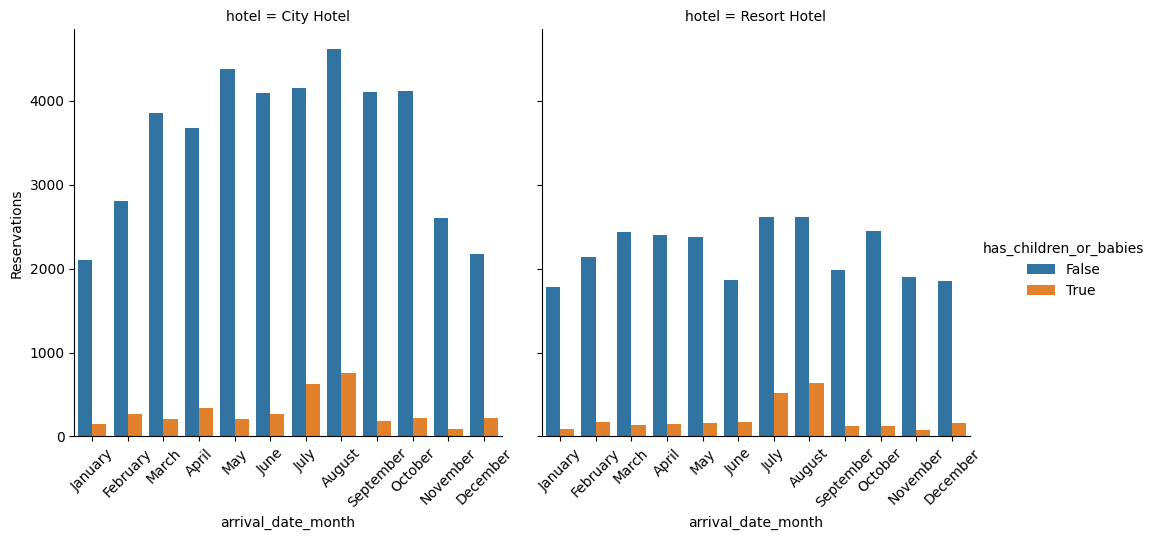

In [24]:
# Find the number of reservations with children or babies for each month

# to avoid the modifications in original df
df_not_canceled = df[df['is_canceled'] == 0].copy()

# 1. Create a new column in df_not_cancled for reservations with children or babies
df_not_canceled['has_children_or_babies'] = (df_not_canceled['children'] > 0) | (df_not_canceled['babies'] > 0)

# 2. Group the data
grouped_data = df_not_canceled.groupby(['hotel', 'arrival_date_month', 'has_children_or_babies']).size().reset_index(name = 'Reservations')
#print(grouped_data.head())

# Sort the months in order from Jan to Dec
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_data['arrival_date_month'] = pd.Categorical(grouped_data['arrival_date_month'], categories = month_order, ordered=True)


# 3. Plot the data
g = sns.catplot(x='arrival_date_month', y='Reservations', hue='has_children_or_babies', col='hotel', data=grouped_data, kind='bar')
g.set_xticklabels(rotation=45)
plt.show()



Question 6: Using the filtered dataset from Question 4, create a single column for "arrival_date" that shows the date of arrival in Year-Month-Day format. (5 points)

In [25]:
# will need to combine colums 'arrival_date_year', 'arrival_date_month' and 'arrival_date_day_of_month' of dataframe
# to form the "arrival_date" column

# 1. Conver the months to numbers to satisfy yyyy-mm-dd format
month_to_num = {
    'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09',
    'october':'10', 'November':'11', 'December':'12'
}

df_not_canceled['arrival_date_month'] = df_not_canceled['arrival_date_month'].map(month_to_num)

# 2. Combining columns to create a single 'arrival_date' column using pandas datetime method
df_not_canceled['arrival_date'] = pd.to_datetime(df_not_canceled['arrival_date_year'].astype(str) + '-' +
                                                 df_not_canceled['arrival_date_month'].astype(str) + '-' +
                                                 df_not_canceled['arrival_date_day_of_month'].astype(str))

# print to confirm the addition of column
print(df_not_canceled[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head())





ParserError: ignored

Question 7A: Create a new dataframe that contains the date of arrival and the number of reservations arriving on that particular day. Sort that dataframe by number of daily reservations, from highest to lowest. Display the first 20 rows of the dataframe. (2.5 points)

Question 7B: Visualize the data from Question 7A as a line plot. (2.5 points)

Question 8A: What is the average daily reservation rate by hotel and customer type? Print your results in a dataframe and display all rows. (2.5 points)

Question 8B: Plot the dataframe from Question 8A as a boxplot. (2.5 points)

Question 9A: Import the "Country Codes and Coordinates" spreadsheet into your environment, and merge it with your filtered dataset from Question 4. Display the top 10 countries by number of reservations. (2.5 points)

Question 9B: Visualize the data from Question 9A as a horizontal bar plot. (2.5 points)

Question 10A: How many guests (including children and babies) are present on the average reservation? (2.5 points)

Question 10B: True or False - Hotels below the equator have a higher average number of guests on reservations. (2.5 points)